In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import clear_output
import random
import csv
import datetime

In [2]:
def HeaderMaker(PatientFile):
#     df_cleaned = pd.read_csv('/data/ortho/' + PatientFile, header=None)
    df_cleaned = pd.read_csv(PatientFile, header=None)

    df_cleaned = df_cleaned.rename(columns={0: "thorax_r_x", 1: "thorax_r_y", 2: "thorax_r_z"})
    df_cleaned = df_cleaned.rename(columns={3: "clavicula_r_x", 4: "clavicula_r_y", 5: "clavicula_r_z"})
    df_cleaned = df_cleaned.rename(columns={6: "scapula_r_x", 7: "scapula_r_y", 8: "scapula_r_z"})
    df_cleaned = df_cleaned.rename(columns={9: "humerus_r_x", 10: "humerus_r_y", 11: "humerus_r_z"})
    df_cleaned = df_cleaned.rename(columns={12: "ellebooghoek_r"})
    df_cleaned = df_cleaned.rename(columns={15: "thorax_l_x", 16: "thorax_l_y", 17: "thorax_l_z"})
    df_cleaned = df_cleaned.rename(columns={18: "clavicula_l_x", 19: "clavicula_l_y", 20: "clavicula_l_z"})
    df_cleaned = df_cleaned.rename(columns={21: "scapula_l_x", 22: "scapula_l_y", 23: "scapula_l_z"})
    df_cleaned = df_cleaned.rename(columns={24: "humerus_l_x", 25: "humerus_l_y", 26: "humerus_l_z"})
    df_cleaned = df_cleaned.rename(columns={27: "ellebooghoek_l"})
    
    return df_cleaned

def VisualizeItemsData(items, x, y, z):
    for i in items:
        fig = plt.figure()
        
        try:
            splitted = i.split('.')[0].split('_')
            Cat = splitted[0]
            pat = splitted[1]
            meting = splitted[2]
            oef = splitted[3]
            titel = '%s %s %s %s' % (Cat, pat, meting, oef)
        except(IndexError):
            oef = 'failed'
            titel = oef

        data = HeaderMaker(i)

        xlist = data[x]
        ylist = data[y]
        zlist = data[z]
        
        plt.title('oefening: %s' % (oef))
#         plt.ylim((-180,180))
        plt.plot(xlist, color = 'red')
        plt.plot(ylist, color = 'blue')
        plt.plot(zlist, color = 'green')
        plt.legend()
        
    plt.tight_layout()  
    plt.show()

def CreateListData(keywordslist):
    allitems = os.listdir('/data/ortho/')
    filteredlist = []
    for i in keywordslist:
        for x in allitems:
            if (i in x):
                filteredlist.append(x)
        allitems = filteredlist
        filteredlist = []
    finallist = []
    for i in allitems:
        finallist.append('/data/ortho/%s' % i)
    return finallist


def VisualizeItems(items, x, y, z, user):
    for i in items:
        if not os.path.exists(i):
            print('Skip this file, does not excist anymore %s' % i)
            continue
        
        try:
            splitted = i.split('.')[0].split('_')
            Cat = splitted[0].split('/')[-1]
            pat = splitted[1]
            meting = splitted[2]
            oef = splitted[3]
            titel = '%s %s %s %s' % (Cat, pat, meting, oef)
        except(IndexError):
            oef = 'failed'
            titel = oef
        

        data = HeaderMaker(i)

        xlist = data[x]
        ylist = data[y]
        zlist = data[z]
        
        MetaData = DrawAndAsk(xlist, ylist, zlist, titel)
        MetaData['FileName'] = i
        MetaData['User'] = user
        MetaData['Date'] = str(datetime.datetime.today())
        
        with open('Metadata.csv', 'a') as f:
            header = ['FileName','Split','RemoveJunkBefore','RemoveJunkAfter','Date','User']
            dict_writer = csv.DictWriter(f, header, -999) #DefaultValue -999
            dict_writer.writerow(MetaData)
        if '/datc/' in i:
            print('Remove %s' % i)
            os.remove(i)
        else:
            raise ValueError('Not a datc File, you are currently working in dir: %s' % i)
        

def CreateList(keywordslist):
    allitems = os.listdir('/datc/ortho/')
    filteredlist = []
    for i in keywordslist:
        for x in allitems:
            if (i in x):
                filteredlist.append(x)
        allitems = filteredlist
        filteredlist = []
    finallist = []
    for i in allitems:
        finallist.append('/datc/ortho/%s' % i)
    return finallist

def DrawAndAsk(xlist, ylist, zlist, titel):
    Done = False
    Happy = False
    
    while(not Happy):
        CheckingDict = {'Split': {'Active': True, 'CheckingStage': False, 'Message': 'Voer nummer voor splitsing in', 'Value': None, 'NextDict': 'RemoveJunkBefore'},
                       'RemoveJunkBefore': {'Active': False, 'CheckingStage': False, 'Message': 'Voer nummer wanneer de opdracht echt begint in', 'Value': None, 'NextDict': 'RemoveJunkAfter'},
                       'RemoveJunkAfter': {'Active': False, 'CheckingStage': False, 'Message': 'Voer nummer wanneer de opdracht echt eindigd in', 'Value': None, 'NextDict': 'Done'},
                       'Done': {'Active': False}}
        Reset = False

        while(not Done):
            
            
            
            
            fig = plt.figure()
            plt.title('%s' % (titel))
            #         plt.ylim((-180,180))
            plt.plot(xlist, color = 'red')
            plt.plot(ylist, color = 'blue')
            plt.plot(zlist, color = 'green')

            #Print the split Line
            if CheckingDict['Split']['CheckingStage']:
                if CheckingDict['Split']['Active']:
                    plt.axvline(x=CheckingDict['Split']['Value'], color='r')
                else:
                    plt.axvline(x=CheckingDict['Split']['Value'], color='grey')

            #Plot theLeft and Right selection

            axes = plt.gca()
            ymin, ymax = axes.get_ylim()
            xmin, xmax = axes.get_xlim()

            steps = 10        
            if CheckingDict['RemoveJunkBefore']['CheckingStage']:
                xsteps = (CheckingDict['RemoveJunkBefore']['Value']-xmin) / steps
                ysteps = (ymax-ymin) / steps
                if CheckingDict['RemoveJunkBefore']['Active']:
                    for i in range(1, steps+1):
                        plt.plot((0, xmin + xsteps * i), (ymin + ysteps * i-1, ymin - ysteps), c='r', alpha=.2)
                        plt.plot((0, CheckingDict['RemoveJunkBefore']['Value']), (ymax + ysteps * i-1, (ymin + ysteps * i-1)+0.2), c='r', alpha=.2)
                    plt.axvline(CheckingDict['RemoveJunkBefore']['Value'], c='r')
                else:
                    for i in range(1, steps+1):
                        plt.plot((0, xmin + xsteps * i), (ymin + ysteps * i-1, ymin - ysteps), c='grey', alpha=.2)
                        plt.plot((0, CheckingDict['RemoveJunkBefore']['Value']), (ymax + ysteps * i-1, (ymin + ysteps * i-1)+0.2), c='grey', alpha=.2)
                    plt.axvline(CheckingDict['RemoveJunkBefore']['Value'], c='grey')

            if CheckingDict['RemoveJunkAfter']['CheckingStage']:
                RightXsteps = (xmax-CheckingDict['RemoveJunkAfter']['Value']) / steps
                if CheckingDict['RemoveJunkAfter']['Active']:
                    for i in range(1, steps+1):
                        plt.plot((xmax, xmax - RightXsteps * i), (ymin + ysteps * i-1, ymin - ysteps), c='r', alpha=.2)
                        plt.plot((xmax, CheckingDict['RemoveJunkAfter']['Value']), (ymax + ysteps * i-1, (ymin + ysteps * i-1)+0.2), c='r', alpha=.2)
                    plt.axvline(CheckingDict['RemoveJunkAfter']['Value'], c='r')
                else:
                    for i in range(1, steps+1):
                        plt.plot((xmax, xmax - RightXsteps * i), (ymin + ysteps * i-1, ymin - ysteps), c='grey', alpha=.2)
                        plt.plot((xmax, CheckingDict['RemoveJunkAfter']['Value']), (ymax + ysteps * i-1, (ymin + ysteps * i-1)+0.2), c='grey', alpha=.2)
                    plt.axvline(CheckingDict['RemoveJunkAfter']['Value'], c='grey')


            plt.ylim(ymin,ymax)
            plt.xlim(-.1,xmax)
            plt.margins(0,0)




            plt.legend()

            plt.tight_layout()  
            plt.show()

            for Name in CheckingDict:
                if Name == 'Done':
                    if CheckingDict[Name]['Active']:
                        Done = True
                    continue

                while(CheckingDict[Name]['Active']):
                    print(CheckingDict[Name]['Message'])
                    string = input()

                    if(CheckingDict[Name]['CheckingStage'] and string == ''):
                        # Confirm the placing with not writing anything
                        print('Confirmed')
                        CheckingDict[Name]['Active'] = False
                        if CheckingDict[Name]['NextDict'] in CheckingDict:
                            CheckingDict[CheckingDict[Name]['NextDict']]['Active'] = True
                        Reset = True
                        break

                    try:
                        CheckingDict[Name]['Value'] = int(string)
                    except(ValueError):
                        print('Not a Number Input')
                        continue
                    CheckingDict[Name]['CheckingStage'] = True
                    break
                if Reset:
                    Reset = False
                    break

            if not Done:
                clear_output()

        print('Are you Happy (y/n)')
        HappyCheck = True
        while(HappyCheck):
            string = input()
            if (string == 'y' or string == 'Y'):
                Happy = True
                HappyCheck = False
                break
            elif (string == 'n' or string == 'N'):
                HappyCheck = False
                Done = False
                break
            else:
                print('Foute waarde')
                
    
    ReturnItems = {}
    for Check in CheckingDict:
        if Check == 'Done':
            continue
        ReturnItems[Check] = CheckingDict[Check]['Value']
        
    
    return ReturnItems


# Data Verdubbelaar masters

Verander TestPersoon naar jou naam, bijvoorbeeld Vincent.

Cycle door alle Categorien en Oefeningen heen

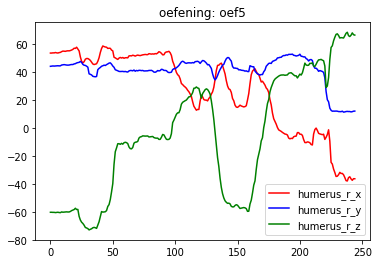

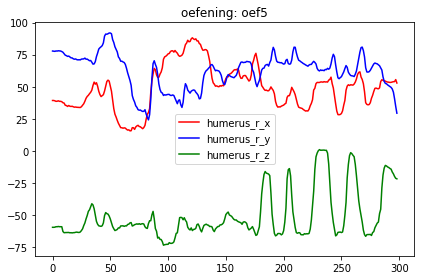

In [16]:
# Welke data wil je zien?

# x, y, z = ("thorax_r_x","thorax_r_y", "thorax_r_z")
# x, y, z = ("clavicula_r_x", "clavicula_r_y", "clavicula_r_z")
# x, y, z = ("scapula_r_x", "scapula_r_y", "scapula_r_z")
x, y, z = ("humerus_r_x", "humerus_r_y", "humerus_r_z")

TestPersoon = 'JouwNaam'

Cat = 'Cat3'
oef = 'oef5.'

AlleOefeningen = CreateList(['meting', Cat, oef])
AlleOefeningenData = CreateListData(['meting', Cat, oef, 'pat31'])
VisualizeItemsData(AlleOefeningenData, x, y, z)




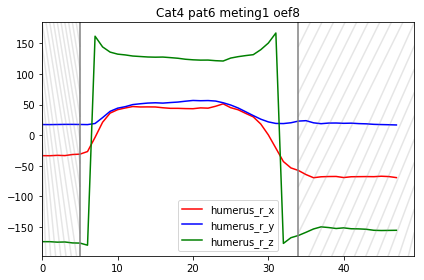

Are you Happy (y/n)
y
Remove /datc/ortho/Cat4_pat6_meting1_oef8.csv


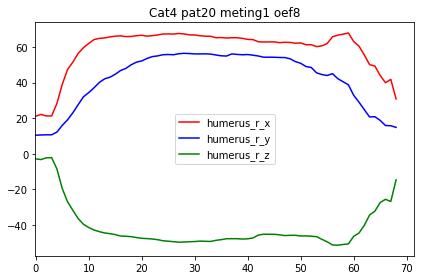

Voer nummer voor splitsing in


In [ ]:
VisualizeItems(AlleOefeningen, x, y, z, TestPersoon)
print('Current Categorie and Oefening is done')